In [1]:
import pandas as pd

df = pd.read_csv('../data/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Veri setinin kaç satır ve sütundan oluştuğuna bakalım
df.shape

(891, 12)

In [3]:
# Bütün sütun adlarını ve veri türlerini görelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Hangi sütunda kaç tane eksik (NaN) değer var?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Bazı temel istatistiklere bakalım
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


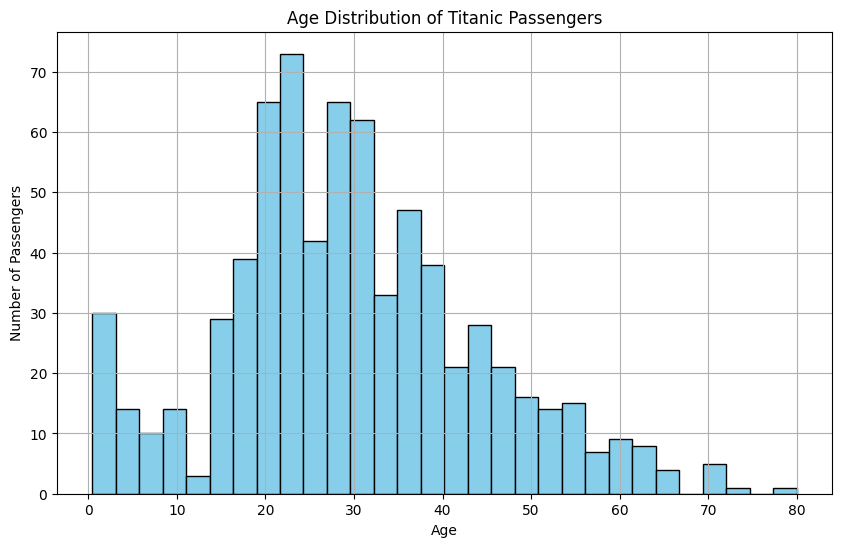

In [6]:
import matplotlib.pyplot as plt

# Histogram çizimi
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [7]:
median_age = df['Age'].median()
df.loc[:, 'Age'] = df['Age'].fillna(median_age)

In [8]:
df['Age'].isnull().sum()

np.int64(0)

In [9]:
df['Age'].mean()

np.float64(29.36158249158249)

In [10]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
df.loc[:, 'Embarked'] = df['Embarked'].fillna('S')

In [12]:
df['Embarked'].isnull().sum()

np.int64(0)

In [13]:
df.drop(columns=['Cabin'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


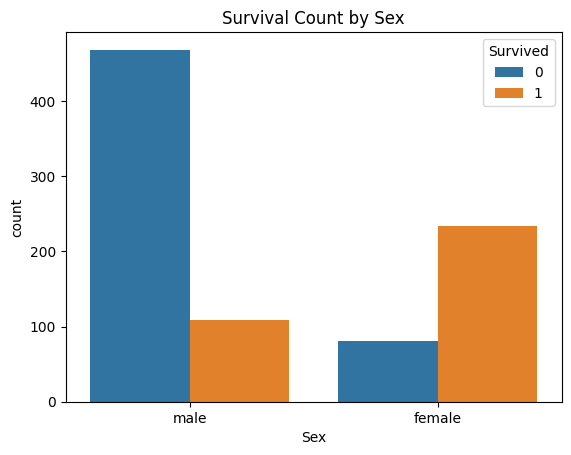

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

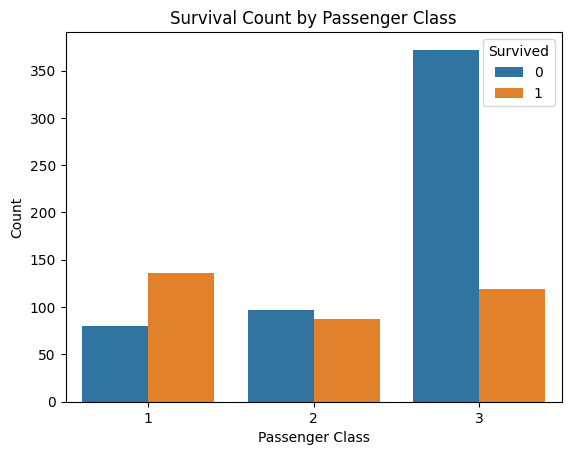

In [16]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

In [17]:
# Yaş gruplarını oluştur
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

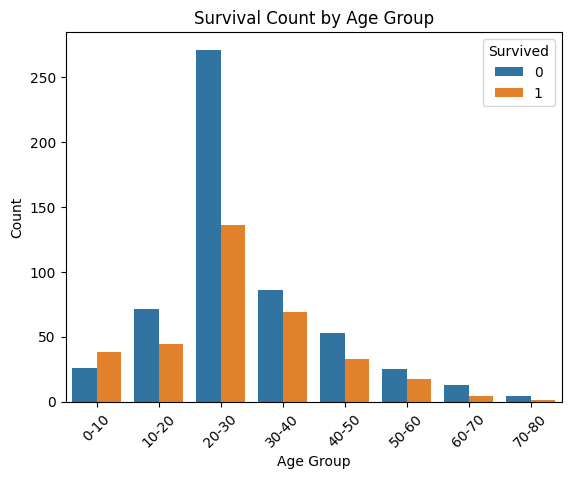

In [18]:
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Cinsiyeti 0 ve 1 olarak kodla: female -> 0, male -> 1
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Embarked sütununu sayısal hale getir: S -> 0, C -> 1, Q -> 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,30-40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,30-40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,30-40


In [21]:
age_group_map = {
    '0-10': 0,
    '10-20': 1,
    '20-30': 2,
    '30-40': 3,
    '40-50': 4,
    '50-60': 5,
    '60-70': 6,
    '70-80': 7
}

df['AgeGroup'] = df['AgeGroup'].map(age_group_map)

In [22]:
from sklearn.model_selection import train_test_split

# Feature ve hedef değişkeni ayır
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']

# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

# Modeli oluştur
model = LogisticRegression(max_iter=1000)

# Eğit
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test seti doğruluk oranı: {:.2f}%".format(accuracy * 100))

Test seti doğruluk oranı: 80.45%


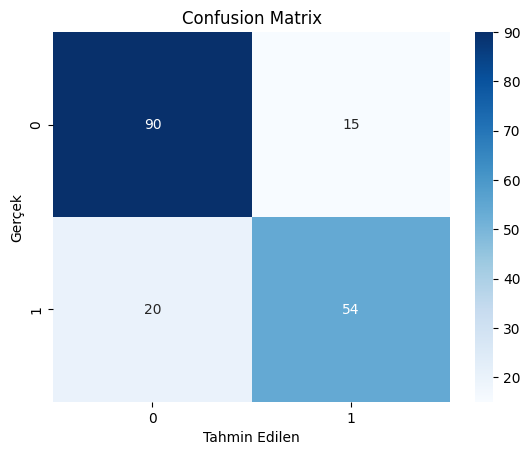

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# Özellik isimleri ve katsayıları
feature_names = X.columns
coefficients = model.coef_[0]

# Hepsini bir arada görelim
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Pclass: -0.9585
Sex: -2.6070
Age: -0.1089
SibSp: -0.3052
Parch: -0.1316
Fare: 0.0028
Embarked: 0.2640
AgeGroup: 0.7942


In [28]:
X = X.drop('Embarked', axis=1)

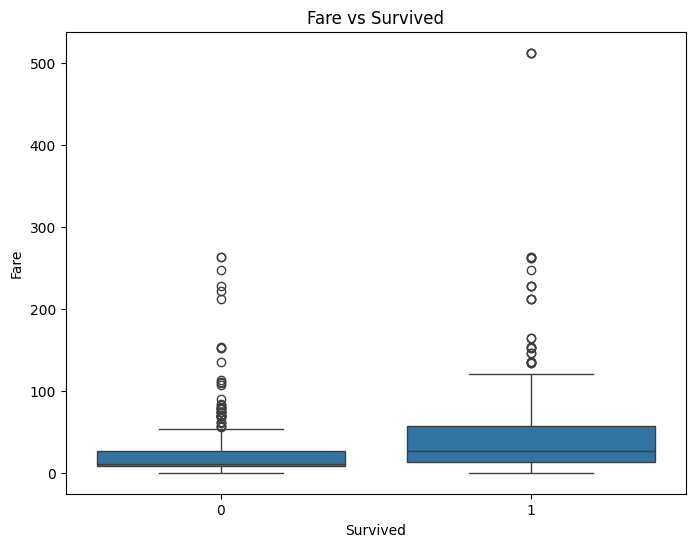

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=y, y=df['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare vs Survived')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [31]:
feature_names = X.columns
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Pclass: -0.7509
Sex: -1.8848
Age: -0.0628
SibSp: -0.2505
Parch: -0.0397
Fare: 0.0041
AgeGroup: 0.2142


In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Test seti doğruluk oranı: {:.2f}%".format(accuracy * 100))

Test seti doğruluk oranı: 81.01%


In [34]:
# Fare'ı kategorik gruplara ayır (örnek aralıklarla)
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 30, 100, 600],
                         labels=['0-10', '10-30', '30-100', '100+'])

In [35]:
# Fare değişkenini belirli aralıklara bölüyoruz
df['FareGroup'] = pd.cut(
    df['Fare'],
    bins=[0, 10, 30, 100, 600],
    labels=['0-10', '10-30', '30-100', '100+']
)

In [36]:
df.drop('Fare', axis=1, inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder

le_fare = LabelEncoder()
df['FareGroup'] = le_fare.fit_transform(df['FareGroup'])

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,1,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0,3,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0,3,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Embarked     891 non-null    int64   
 10  AgeGroup     891 non-null    category
 11  FareGroup    891 non-null    int64   
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 77.9+ KB


In [40]:
X = df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = df['Survived']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
from sklearn.metrics import accuracy_score

# Tahmin yap
y_pred = model.predict(X_test)

# Doğruluk oranı
accuracy = accuracy_score(y_test, y_pred)
print("Test seti doğruluk oranı: {:.2f}%".format(accuracy * 100))

# Özellik isimleri ve katsayılar
feature_names = X.columns
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Test seti doğruluk oranı: 81.01%
Pclass: -1.0002
Sex: -2.6108
Age: -0.1100
SibSp: -0.3069
Parch: -0.1111
Embarked: 0.2969
AgeGroup: 0.8045
FareGroup: 0.0537


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [45]:
from sklearn.metrics import accuracy_score

# Tahmin ve başarı oranı
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test seti doğruluk oranı: {:.2f}%".format(accuracy * 100))

# Katsayılar
feature_names = X.columns
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Test seti doğruluk oranı: 81.01%
Pclass: -0.7903
Sex: -1.8928
Age: -0.0633
SibSp: -0.2556
Parch: -0.0177
Embarked: 0.2499
AgeGroup: 0.3730
FareGroup: 0.0946


In [46]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Embarked', 'AgeGroup', 'FareGroup'],
      dtype='object')


In [47]:
original_df = pd.read_csv('../data/train.csv')

In [48]:
df['Fare'] = original_df['Fare']

In [49]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Embarked', 'AgeGroup', 'FareGroup', 'Fare'],
      dtype='object')


In [50]:
fare_bins = [0, 20, 100, df['Fare'].max()]
fare_labels = ['Low', 'Mid', 'High']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

In [51]:
print(df['FareGroup'].value_counts())

FareGroup
Low     500
Mid     323
High     53
Name: count, dtype: int64


In [52]:
df_encoded_1 = pd.get_dummies(df, columns=['FareGroup'], drop_first=True)

In [53]:
df_encoded_2 = pd.get_dummies(df, columns=['FareGroup'], drop_first=False)

In [54]:
import os
import pickle

# Alt klasörü oluştur
os.makedirs("data/processed", exist_ok=True)

# Kaydet
with open("data/processed/processed_df.pkl", "wb") as f:
    pickle.dump(df, f)

In [55]:
df.head()  # İlk 5 satıra bak
df.info()  # Sütunları ve boş değerleri kontrol et

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Embarked     891 non-null    int64   
 10  AgeGroup     891 non-null    category
 11  FareGroup    876 non-null    category
 12  Fare         891 non-null    float64 
dtypes: category(2), float64(2), int64(7), object(2)
memory usage: 78.9+ KB


In [56]:
df[df['Fare'].isna()]           # Fare sütununda NaN var mı?
df[df['Fare'] <= 0]             # 0 veya negatif değer var mı?
df[df['FareGroup'].isna()]      # FareGroup NaN'ları doğrudan görelim

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,AgeGroup,FareGroup,Fare
179,180,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0,3,NaN,0.0
263,264,0,1,"Harrison, Mr. William",1,40.0,0,0,112059,0,3,NaN,0.0
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0,2,NaN,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",1,28.0,0,0,239853,0,2,NaN,0.0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0,1,NaN,0.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",1,28.0,0,0,239853,0,2,NaN,0.0
466,467,0,2,"Campbell, Mr. William",1,28.0,0,0,239853,0,2,NaN,0.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,28.0,0,0,239854,0,2,NaN,0.0
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0,4,NaN,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",1,28.0,0,0,112052,0,2,NaN,0.0


In [57]:
# Fare değerine göre yeni aralıkları tanımla
fare_bins = [-1, 20, 100, df['Fare'].max()]  # -1 ile başlamak 0'ı da kapsar
fare_labels = ['Low', 'Mid', 'High']

# FareGroup sütununu yeniden oluştur
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

# Sonuçları kontrol et
print(df['FareGroup'].value_counts(dropna=False))

FareGroup
Low     515
Mid     323
High     53
Name: count, dtype: int64


In [58]:
df.head()  # İlk 5 satıra bak
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Embarked     891 non-null    int64   
 10  AgeGroup     891 non-null    category
 11  FareGroup    891 non-null    category
 12  Fare         891 non-null    float64 
dtypes: category(2), float64(2), int64(7), object(2)
memory usage: 78.9+ KB


In [59]:
import os
print(os.getcwd())

/Users/aysegul/Documents/GitHub/titanic-ml/notebooks


In [60]:
# Alt klasörü oluştur
os.makedirs("data/processed", exist_ok=True)

# Kaydet
with open("data/processed/processed_df.pkl", "wb") as f:
    pickle.dump(df, f)

In [61]:
df.drop('Embarked', axis=1, inplace=True)

In [62]:
import os

# Mutlak değil, göreceli yol üzerinden
os.makedirs("notebooks/data/processed", exist_ok=True)

with open("notebooks/data/processed/processed_df.pkl", "wb") as f:
    pickle.dump(df, f)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   AgeGroup     891 non-null    category
 10  FareGroup    891 non-null    category
 11  Fare         891 non-null    float64 
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 72.0+ KB
